## Chapter 7. Regression models

### Normal simple linear regression

Data: $(x_i, y_i)$, $ i = 1, \dots, n$

Model: $Y_i = \alpha + \beta x_i + e_i$ with $e_i \sim N(0, \sigma^2)$ i.i.d.

### Example 

The price of diamonds $Y$ depends on the size $X$.

In [80]:
size = [0.17 0.16 0.17 0.18 0.25 0.16 0.15 0.19 0.21 0.15 0.18 0.28 0.16 0.20 0.23 0.29 0.12 ...
 0.26 0.25 0.27 0.18 0.16 0.17 0.16 0.17 0.18 0.17 0.18 0.17 0.15 0.17 0.32 0.32 0.15...
 0.16 0.16 0.23 0.23 0.17 0.33 0.25 0.35 0.18 0.25 0.25 0.15 0.26 0.15]';
price = [...
355  328  350  325  642  342  322  485  483  323  462  823  336  498  595  860  223 ...
663  750  720  468  345  352  332  353  438  318  419  346  315  350  918  919  298 ...
339  338  595  553  345  945  655 1086  443  678  675  287  693  316]';
dia = dataset(size, price)


dia = 
    size    price  
    0.17     355.00
    0.16     328.00
    0.17     350.00
    0.18     325.00
    0.25     642.00
    0.16     342.00
    0.15     322.00
    0.19     485.00
    0.21     483.00
    0.15     323.00
    0.18     462.00
    0.28     823.00
    0.16     336.00
    0.20     498.00
    0.23     595.00
    0.29     860.00
    0.12     223.00
    0.26     663.00
    0.25     750.00
    0.27     720.00
    0.18     468.00
    0.16     345.00
    0.17     352.00
    0.16     332.00
    0.17     353.00
    0.18     438.00
    0.17     318.00
    0.18     419.00
    0.17     346.00
    0.15     315.00
    0.17     350.00
    0.32     918.00
    0.32     919.00
    0.15     298.00
    0.16     339.00
    0.16     338.00
    0.23     595.00
    0.23     553.00
    0.17     345.00
    0.33     945.00
    0.25     655.00
    0.35    1086.00
    0.18     443.00
    0.25     678.00
    0.25     675.00
    0.15     287.00
    0.26     693.00
    0.15     316.00


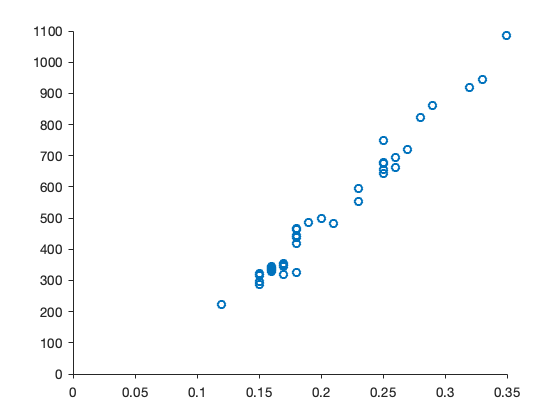

In [81]:
scatter(size, price)
xlim([0 0.35])
ylim([0 1100])

In [82]:
mq = fitlm(dia, 'price ~ size') % ~ is obtained with ALT125 with numeric keypad on

mq = 
Linear regression model:
    price ~ 1 + size

Estimated Coefficients:
                   Estimate     SE      tStat     pValue
                   ________    _____    ______    ______
    (Intercept)    -259.63     17.32    -14.99     0.00 
    size           3721.02     81.79     45.50     0.00 

Number of observations: 48, Error degrees of freedom: 46
Root Mean Squared Error: 31.8
R-squared: 0.978,  Adjusted R-Squared: 0.978
F-statistic vs. constant model: 2.07e+03, p-value = 6.75e-40


In [83]:
format bank
[price mq.Fitted price-mq.Fitted]

ans =
        355.00        372.95        -17.95
        328.00        335.74         -7.74
        350.00        372.95        -22.95
        325.00        410.16        -85.16
        642.00        670.63        -28.63
        342.00        335.74          6.26
        322.00        298.53         23.47
        485.00        447.37         37.63
        483.00        521.79        -38.79
        323.00        298.53         24.47
        462.00        410.16         51.84
        823.00        782.26         40.74
        336.00        335.74          0.26
        498.00        484.58         13.42
        595.00        596.21         -1.21
        860.00        819.47         40.53
        223.00        186.90         36.10
        663.00        707.84        -44.84
        750.00        670.63         79.37
        720.00        745.05        -25.05
        468.00        410.16         57.84
        345.00        335.74          9.26
        352.00        372.95        -20.95
     

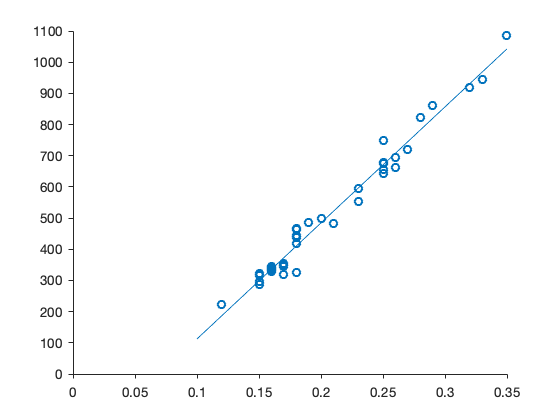

In [84]:
scatter(size, price)
refline(3721.02, -259.63)
xlim([0 0.35])
ylim([0 1100])

### Regression to the mean
We simulate data from the simple regression model
\begin{align*}
X_i &\sim N(0,1) \\
Y_i &\sim N( \textstyle \frac{1}{2} X_i, \sigma = 1/2)
\end{align*}

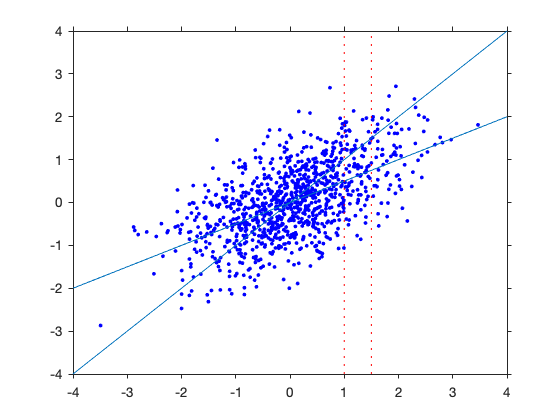

In [85]:
n = 1000;
x = randn(n,1);
y =  x ./2  + randn(n,1) ./ sqrt(2);
plot(x,y, '.b')
refline(1/2,0)
refline([1,0])
vline([1,1.5])

### Example 7.6 Height data

Data found on the book webpage at `http://www.aup.nl`. 

Height 
- $Y$ of adolescents (column 1)
- $X_2$ of father (column 2) 
- $X_3$ of mother (column 3)
- $X_4$ gender (column 4, 1 = man, 2 = woman)

In [86]:
X = [ 170 180 164 2
175 173 165 1
171 178 176 2
167 180 168 2
180 190 167 2
169 169 169 2
169 189 168 2
183 196 173 2
174 182 163 2
173 176 176 2
163 167 168 2
199 182 164 1
186 183 173 1
178 176 167 2
179 176 176 2
175 174 175 2
176 181 164 2
170 171 168 2
176 183 170 2
180 184 169 2
176 165 170 1
193 189 182 1
168 188 172 2
168 189 170 2
171 175 171 2
188 184 170 1
169 175 171 2
184 185 164 1
189 177 177 1
173 178 169 2
185 174 169 1
177 167 171 1
186 178 169 1
190 178 168 1
162 183 160 2
174 182 167 2
170 183 163 2
174 177 167 2
164 173 164 2
182 176 157 1
159 183 160 2
171 177 165 2
170 172 166 2
187 181 169 1
184 177 163 1
174 174 168 2
171 185 177 2
183 182 165 1
162 176 165 2
172 167 155 1
169.5 179 159 2
179 179 166 1
176 182 165 2
175 186 164 2
191 187 169 1
189 179 163 1
183 179 174 1
164 174 160 2
186 188 167 1
174 178 172 1
191 184 167 1
179 182 169 1
175 172 168 1
174 168 171 1
173 182 174 2
185 183 167 1
169 179 170 2
183 172 170 1
170 191 163 2
185 177 172 1
189 181 165 1
197 180 180 1
179 182 176 2
171 183 168 2
198 186 174 1
180 177 168 1
196 187 174 1
174 168 172 2
168 183 167 2
170 177.5 153.5 1
163 179 164 2
167 181 161 2
171 176 170 2
165 171 157 2
167 176 176 2
176 179 168 2
164 180 160 2
184 184 171 2
169 164 165 2
185 176 167 2
170 183 160 2
178 186 172 2
187 180 170 1
158 171 155 2
178 189 167 2
185 188 177 2
180 176 168 1
171 181 165 1
165 173 162 2
189 180 169 1
170 180 165 2
183 187 178 2
173 176 172 2
160 172 162 2
168 176.5 173 2
167.25 178.8 167.5 2
179 180 162 1
180 172.3 165.7 1
180.5 177.4 161.3 1
169 169 160.5 1
170.75 176.9 167.5 2];

Model: $Y = \beta_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + e$ with $e\sim N(0, \sigma^2)$

In [87]:
Y = X(:,1); father = X(:,2); mother = X(:, 3); gender = X(:,4);
% Transform the gender code into 1 for a boy and -1 for a girl
gender = 2 * (1 - gender) + 1;

height = dataset(Y, father, mother, gender)

height = 
    Y         father    mother    gender
    170.00    180.00    164.00    -1.00 
    175.00    173.00    165.00     1.00 
    171.00    178.00    176.00    -1.00 
    167.00    180.00    168.00    -1.00 
    180.00    190.00    167.00    -1.00 
    169.00    169.00    169.00    -1.00 
    169.00    189.00    168.00    -1.00 
    183.00    196.00    173.00    -1.00 
    174.00    182.00    163.00    -1.00 
    173.00    176.00    176.00    -1.00 
    163.00    167.00    168.00    -1.00 
    199.00    182.00    164.00     1.00 
    186.00    183.00    173.00     1.00 
    178.00    176.00    167.00    -1.00 
    179.00    176.00    176.00    -1.00 
    175.00    174.00    175.00    -1.00 
    176.00    181.00    164.00    -1.00 
    170.00    171.00    168.00    -1.00 
    176.00    183.00    170.00    -1.00 
    180.00    184.00    169.00    -1.00 
    176.00    165.00    170.00     1.00 
    193.00    189.00    182.00     1.00 
    168.00    188.00    172.00    -1.00 
    16

In [88]:
reg = fitlm(height, 'Y ~ father + mother + gender')

reg = 
Linear regression model:
    Y ~ 1 + father + mother + gender

Estimated Coefficients:
                   Estimate     SE      tStat    pValue
                   ________    _____    _____    ______
    (Intercept)      2.52      18.84     0.13     0.89 
    father           0.46       0.08     5.63     0.00 
    mother           0.55       0.09     6.05     0.00 
    gender           6.27       0.49    12.70     0.00 

Number of observations: 111, Error degrees of freedom: 107
Root Mean Squared Error: 5.08
R-squared: 0.692,  Adjusted R-Squared: 0.683
F-statistic vs. constant model: 80, p-value = 3.26e-27


Notes:

- R-squared is the *coefficient of determination* = 0.69.
- all the t-test are highly significant
- the effect of gender is the same whatever the the height of father and mother, i.e., about 12 cm 
$$
E(Y\mid x_2, x_3, 1) - E(Y\mid x_2, x_3, -1) = 6.274 - (-6.274) = 12.5 
$$

### Regression with a linear constraint

Constraining $\beta_3 = \beta_4$ can be done with the model 
$$
Y = \beta_1 + \beta_2 (x_2 + x_3) + \beta_4 x_4 + e \text{ with } e\sim N(0, \sigma^2)
$$

In [89]:
tot = father + mother;
height = dataset(Y, tot, gender);
reg_c = fitlm(height, 'Y ~ tot + gender')

reg_c = 
Linear regression model:
    Y ~ 1 + tot + gender

Estimated Coefficients:
                   Estimate     SE      tStat    pValue
                   ________    _____    _____    ______
    (Intercept)      3.47      18.74     0.18     0.85 
    tot              0.50       0.05     9.28     0.00 
    gender           6.30       0.49    12.80     0.00 

Number of observations: 111, Error degrees of freedom: 108
Root Mean Squared Error: 5.07
R-squared: 0.69,  Adjusted R-Squared: 0.684
F-statistic vs. constant model: 120, p-value = 3.3e-28


In [90]:
eh = Y - reg_c.Fitted

eh =
          0.16
         -4.42
         -3.86
         -4.85
          3.63
          2.17
         -7.37
          0.61
          3.65
         -0.86
         -2.33
         15.56
         -2.46
          8.66
          5.14
          2.65
          5.65
          2.67
          1.64
          5.64
         -1.92
         -2.99
         -9.87
         -9.37
          0.15
          0.54
         -1.85
         -0.95
          1.54
          1.65
          3.07
         -2.42
          2.06
          6.56
         -7.34
          1.65
         -0.85
          4.16
         -2.33
          5.08
        -10.34
          2.16
          3.17
          1.55
          3.57
          5.16
         -7.88
         -0.94
         -6.34
          0.61
          2.67
         -3.94
          4.65
          2.14
          2.54
          7.57
         -3.95
         -0.82
         -1.96
        -11.45
          5.05
         -6.95
         -5.43
         -5.93
         -2.87
         -0.45
     

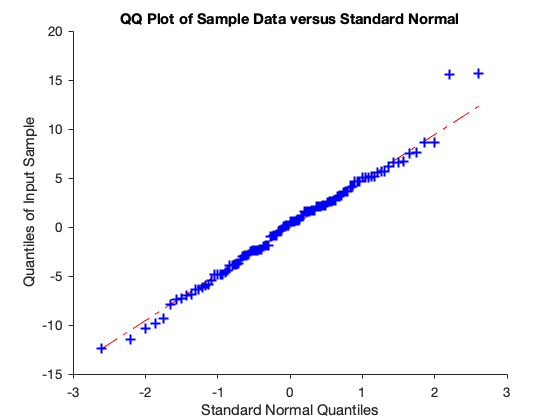

In [91]:
qqplot(eh)

Comment: the normality assumption is fine. There are two possible outliers.

### Additivity and Interaction 

Mr Derek Whiteside of the UK Building Research Station recorded the weekly gas consumption and average external temperature at his own house in south-east England for two heating seasons, one of 26 weeks before, and one of 30 weeks after cavity-wall insulation was installed. The object of the exercise was to assess the effect of the insulation on gas consumption.

- col 1 observation number
- col 2 insulation 1 = no, 2 = yes
- col 3 temperature in Celsius degrees
- col 4 the weekly gas consumption in 1000s of cubic feet.

In [92]:
data = [ 1 1 -0.8 7.2
2      1 -0.7 6.9
3      1  0.4 6.4
4      1  2.5 6.0
5      1  2.9 5.8
6      1  3.2 5.8
7      1  3.6 5.6
8      1  3.9 4.7
9      1  4.2 5.8
10     1  4.3 5.2
11     1  5.4 4.9
12     1  6.0 4.9
13     1  6.0 4.3
14     1  6.0 4.4
15     1  6.2 4.5
16     1  6.3 4.6
17     1  6.9 3.7
18     1  7.0 3.9
19     1  7.4 4.2
20     1  7.5 4.0
21     1  7.5 3.9
22     1  7.6 3.5
23     1  8.0 4.0
24     1  8.5 3.6
25     1  9.1 3.1
26     1 10.2 2.6
27     2 -0.7 4.8
28     2  0.8 4.6
29     2  1.0 4.7
30     2  1.4 4.0
31     2  1.5 4.2
32     2  1.6 4.2
33     2  2.3 4.1
34     2  2.5 4.0
35     2  2.5 3.5
36     2  3.1 3.2
37     2  3.9 3.9
38     2  4.0 3.5
39     2  4.0 3.7
40     2  4.2 3.5
41     2  4.3 3.5
42     2  4.6 3.7
43     2  4.7 3.5
44     2  4.9 3.4
45     2  4.9 3.7
46     2  4.9 4.0
47     2  5.0 3.6
48     2  5.3 3.7
49     2  6.2 2.8
50     2  7.1 3.0
51     2  7.2 2.8
52     2  7.5 2.6
53     2  8.0 2.7
54     2  8.7 2.8
55     2  8.8 1.3
56     2  9.7 1.5];

We recode the variables. 

In [93]:
gas = data(:, 4);       % 1000s of cubic feet
gas = gas * 28.3168466; % liters
temp = data(:, 3);     
insul = data(:, 2) - 1; % 0 = before  1 = after

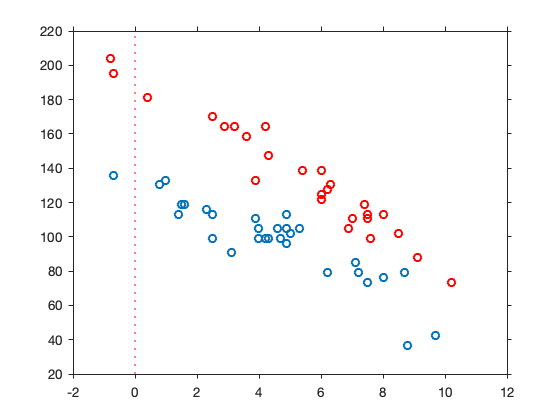

In [94]:
plot(temp(insul==0), gas(insul==0), 'or')
hold on
plot(temp(insul==1), gas(insul==1), 'o')
hold off
vline(0)

**Model with no interaction**

First we fit a model without interaction (the regressors are additive)

In [95]:
whiteside = dataset(temp, gas, insul);
reg_add = fitlm(whiteside, 'gas ~ temp + insul')

reg_add = 
Linear regression model:
    gas ~ 1 + temp + insul

Estimated Coefficients:
                   Estimate     SE     tStat     pValue
                   ________    ____    ______    ______
    (Intercept)     185.51     3.34     55.48     0.00 
    temp             -9.53     0.50    -18.95     0.00 
    insul           -44.32     2.75    -16.13     0.00 

Number of observations: 56, Error degrees of freedom: 53
Root Mean Squared Error: 10.1
R-squared: 0.91,  Adjusted R-Squared: 0.906
F-statistic vs. constant model: 267, p-value = 2.09e-28


Comments: 
 - The effects of temperature and insulation on gas consumptions are both negative. 
 - Consumptions tend to decrease with increasing temperature and after insulation. 
 - The effect of insulation specifically decreases the consumptions of about 44 liters whatever the temperature.
 - The effect of temperature is of about -10 liters per 1 degree of increase of temperature. 
 - Both effect are highly significant
 - The average gas consumption at zero degrees temperature with no insulation is 185.51 liters. 
 - The estimate of the standard deviation $\sigma$ is 10.1
 - The coefficient of determination is 0.91

A graph is obtained plotting the fitted model, i.e., of two parallel regression lines

\begin{align*}
\texttt{gas} &= 185.51 - 9.5342\; \texttt{temp} \qquad (\text{no insulation}) \\ 
\texttt{gas} &= (185.51 -44.322) - 9.5342\; \texttt{temp} \qquad (\text{with insulation}) 
\end{align*}

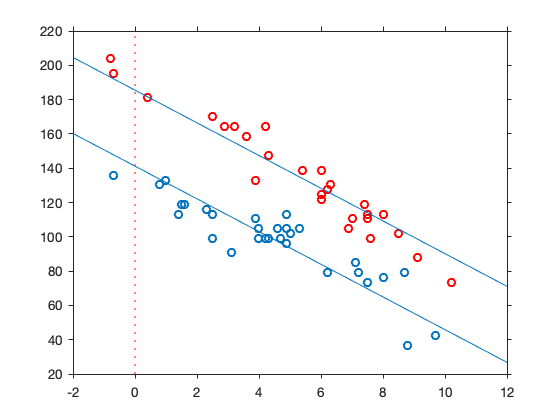

In [96]:
plot(temp(insul==0), gas(insul==0), 'or')
hold on
plot(temp(insul==1), gas(insul==1), 'o')
hold off
vline(0)
refline(-9.5342, 185.51)
refline(-9.5342, 185.51-44.322)

Notes:
- the effect of the insulation is the difference between the intercepts that does not depend on the temperature
- the effect of the temperature is the common slope of the lines

**Model with interaction**

Then we fit a model with interaction. That is we ad a regressor obtained by the product of the two explanatory variables $\texttt{temp} \cdot \texttt{insul}$

In [97]:
reg_int = fitlm(whiteside, 'gas ~ temp + insul + temp:insul')

reg_int = 
Linear regression model:
    gas ~ 1 + temp*insul

Estimated Coefficients:
                   Estimate     SE     tStat     pValue
                   ________    ____    ______    ______
    (Intercept)     194.08     3.85     50.41     0.00 
    temp            -11.14     0.64    -17.49     0.00 
    insul           -60.31     5.10    -11.83     0.00 
    temp:insul        3.27     0.91      3.59     0.00 

Number of observations: 56, Error degrees of freedom: 52
Root Mean Squared Error: 9.15
R-squared: 0.928,  Adjusted R-Squared: 0.924
F-statistic vs. constant model: 222, p-value = 1.23e-29


Comments
- The interaction operator in the model formula is denoted by $\texttt{:}$
- The t-test for the interaction term is highly significant
- The other tests are not relevant (non hierarchical models are usually hardly interpretable)
- The effect of temperature depends on insulation
- The effect of insulation depends on temperature

We can plot the model with two non parallel fitted lines:

\begin{align*}
\texttt{gas} &= 194.08 - 11.135\; \texttt{temp} \qquad (\text{no insulation}) \\ 
\texttt{gas} &= (194.08 -60.314) - (11.135 - 3.265)\; \texttt{temp} \qquad (\text{with insulation}) 
\end{align*}

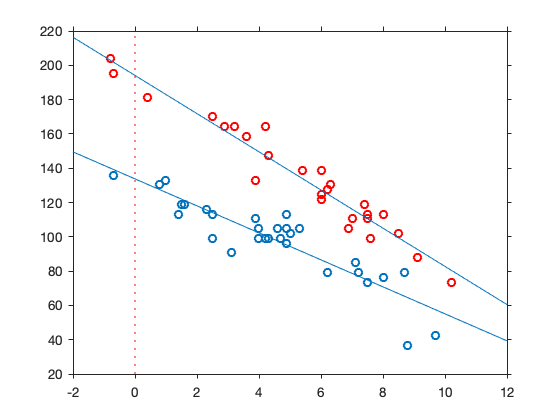

In [98]:
plot(temp(insul==0), gas(insul==0), 'or')
hold on
plot(temp(insul==1), gas(insul==1), 'o')
hold off
vline(0)
refline(-11.135, 194.08)
refline(-11.135 +3.265, 194.08-60.314)

Comments:
- The slopes are significantly different. The difference is $3.265$
- The vertical distance between the lines changes with the temperature. 

### Logistic regression

The **logistic function** (or *sigmoid*) is
$$
G(x) = \frac{e^x}{1+ e^x}  = \frac{1}{1 + e^{-x}} 
$$

The plot is shown below and compared with a normal CDF (in red) for a $N(0, \sigma = 1.8)$.

In [99]:
logi = @(x) 1./(1 + exp(-x));
nor = @(x) normcdf(x, 0, 1.8);

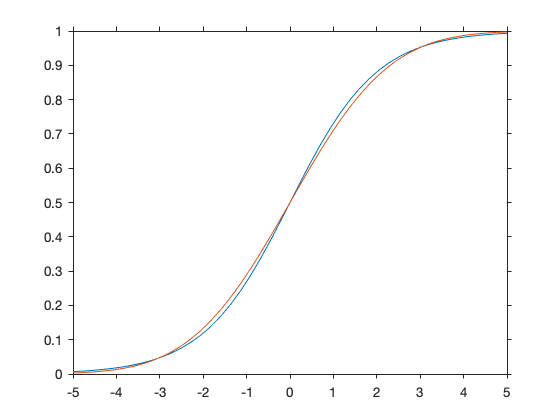

In [100]:
fplot(logi, [-5, 5])
hold on 
fplot(nor)

### Example from Cox and Snell
 
"Minor faults occur irregularly in an industrial process and
the following experiment was done. Batches of raw material were selected and each batch was divided into two equal sections: for each batch, one of the sections was processed by the standard method and the other by a slightly modified process, in which the temperature at one stage is reduced. Before processing, a purity index was measured for the whole batch of material. For the product from each section of material it was recorded whether the minor faults did or did not occur." 
 
Below we consider the data for the sections processed by the standard method. `x` is the purity and `y` is the binary response (1=fault).

In [101]:
x = [7.2 6.3 8.5 7.1 8.2 4.6 8.5 6.9 8.0 8.0 9.1 6.5 4.9 5.3 7.1 8.4 8.5 6.6 9.1 7.1 7.5 8.3]';
y = [0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0]';
data = dataset(x,y)

data = 
    x       y   
    7.20    0.00
    6.30    1.00
    8.50    1.00
    7.10    0.00
    8.20    1.00
    4.60    1.00
    8.50    0.00
    6.90    1.00
    8.00    0.00
    8.00    1.00
    9.10    0.00
    6.50    0.00
    4.90    1.00
    5.30    1.00
    7.10    0.00
    8.40    1.00
    8.50    0.00
    6.60    1.00
    9.10    0.00
    7.10    1.00
    7.50    0.00
    8.30    0.00


Linear regression and logistic regression.

In [102]:
mq = fitlm(data, 'y ~ x')

mq = 
Linear regression model:
    y ~ 1 + x

Estimated Coefficients:
                   Estimate     SE     tStat    pValue
                   ________    ____    _____    ______
    (Intercept)      1.80      0.60     3.00     0.01 
    x               -0.18      0.08    -2.20     0.04 

Number of observations: 22, Error degrees of freedom: 20
Root Mean Squared Error: 0.471
R-squared: 0.194,  Adjusted R-Squared: 0.154
F-statistic vs. constant model: 4.82, p-value = 0.0401


In [103]:
ml = fitglm(data, 'y ~ x', 'Distribution', 'binomial')

ml = 
Generalized linear regression model:
    logit(y) ~ 1 + x
    Distribution = Binomial

Estimated Coefficients:
                   Estimate     SE     tStat    pValue
                   ________    ____    _____    ______
    (Intercept)      6.43      3.51     1.83     0.07 
    x               -0.87      0.46    -1.87     0.06 

22 observations, 20 error degrees of freedom
Dispersion: 1
Chi^2-statistic vs. constant model: 4.72, p-value = 0.0299


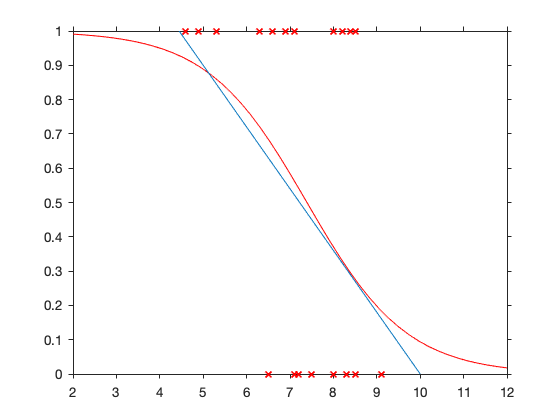

In [104]:
plot(x,y, 'xr')
hold on
logi = @(x) 1./ (1 + exp(-(6.43 - 0.87 .* x)));
fplot(logi, [2, 12], 'r')
refline(-0.18, 1.8)
ylim([0,1])

Comments:
- the effect of purity is not significant but borderline according to the Wald test. The likelihood ratio test is however significant but not highly significant.  
- the effect is negative as expected. 

We consider now also the data for the second section processed at lower temperature.

In [105]:
y2 = [0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 ]';
x2 = x; % the purity are the same because the batches were split in two equal sections

In [106]:
purity = [x;x2]; 
fault = [y;y2];
modified = [zeros(22,1); ones(22,1)];
data2 = dataset(purity, fault, modified)

data2 = 
    purity    fault    modified
    7.20      0.00     0.00    
    6.30      1.00     0.00    
    8.50      1.00     0.00    
    7.10      0.00     0.00    
    8.20      1.00     0.00    
    4.60      1.00     0.00    
    8.50      0.00     0.00    
    6.90      1.00     0.00    
    8.00      0.00     0.00    
    8.00      1.00     0.00    
    9.10      0.00     0.00    
    6.50      0.00     0.00    
    4.90      1.00     0.00    
    5.30      1.00     0.00    
    7.10      0.00     0.00    
    8.40      1.00     0.00    
    8.50      0.00     0.00    
    6.60      1.00     0.00    
    9.10      0.00     0.00    
    7.10      1.00     0.00    
    7.50      0.00     0.00    
    8.30      0.00     0.00    
    7.20      0.00     1.00    
    6.30      0.00     1.00    
    8.50      0.00     1.00    
    7.10      1.00     1.00    
    8.20      0.00     1.00    
    4.60      0.00     1.00    
    8.50      0.00     1.00    
    6.90      1.00     1.00    

The dataset now has a new binary variable indicator of the modified process. We then fit a multiple logistic model without interaction

$$
\text{logit}(p) = \beta_1 + \beta_2\; \texttt{purity} + \beta_3 \;\texttt{modified}
$$

In [107]:
ml2 = fitglm(data2, 'fault ~ purity + modified', 'Distribution', 'binomial')

ml2 = 
Generalized linear regression model:
    logit(fault) ~ 1 + purity + modified
    Distribution = Binomial

Estimated Coefficients:
                   Estimate     SE     tStat    pValue
                   ________    ____    _____    ______
    (Intercept)      4.46      2.16     2.07     0.04 
    purity          -0.60      0.28    -2.13     0.03 
    modified        -0.86      0.67    -1.29     0.20 

44 observations, 41 error degrees of freedom
Dispersion: 1
Chi^2-statistic vs. constant model: 6.72, p-value = 0.0347


Comments:
- The effect of purity is significant and shows that the probaility of faults decreases with increasing purity
- The test related to the effect of the modified process is not significant. Therefore
there is no evidence against $\beta_3 = 0$. The observed effect is nevertheless negative. 

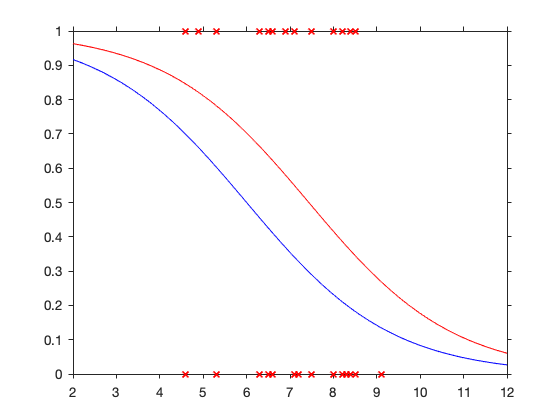

In [108]:
plot(purity,fault, 'xr')
hold on
logi1 = @(x) 1./ (1 + exp(-(4.46 - 0.6 .* x)));
logi2 = @(x) 1./ (1 + exp(-(4.46 - 0.86 - 0.6 .* x)));
fplot(logi1, [2, 12], 'r')
fplot(logi2, [2, 12], 'b')

ylim([0,1])